<a href="https://colab.research.google.com/github/snemmani/ml_ai/blob/master/Lab/Day1_Cybersecurity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from random import random

time_series = [2*x + random() for x in range(1,100)]

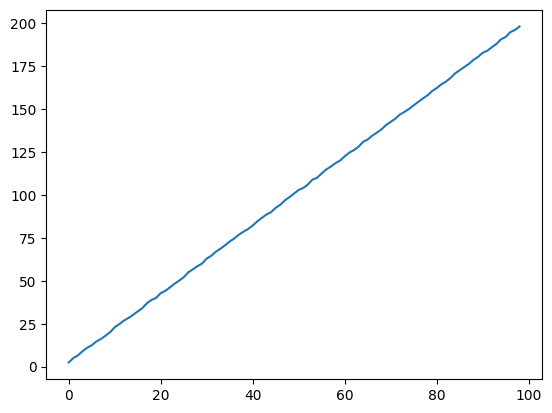

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(time_series)

In [5]:
from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(time_series, 2)
model_fit = model.fit()

y = model_fit.predict(len(time_series), len(time_series))

y

array([200.18716055])

In [7]:
model_fit.params

array([2.93301373, 0.53054271, 0.46942762])

In [18]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(time_series, order = (0,1,2))

model_fit = model.fit()

y = model_fit.predict(len(time_series), len(time_series))

print(y)

[198.57744501]


In [15]:
model_fit.params

array([0.63287843, 0.68099687, 1.24105571])

In [20]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   99
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -150.338
Date:                Mon, 15 Apr 2024   AIC                            306.676
Time:                        10:09:17   BIC                            314.431
Sample:                             0   HQIC                           309.813
                                 - 99                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.6329      0.082      7.731      0.000       0.472       0.793
ma.L2          0.6810      0.094      7.207      0.000       0.496       0.866
sigma2         1.2411      0.243      5.110      0.000       0.765       1.717
===================================================================================
Ljung-Box (L1) (Q):                  25.50   Jarque-Bera (JB):                 0.16
Prob(Q):                              0.00   Prob(JB):                         0.92
Heteroskedasticity (H):               0.77   Skew:                            -0.10
Prob(H) (two-sided):                  0.46   Kurtosis:                         2.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
# Anomaly detection with Isolation forests
import numpy as np
import pandas as pd
random_seed = np.random.RandomState(12)

In [23]:
X_train = 0.5 * random_seed.randn(500, 2)
X_train = np.r_[X_train + 3, X_train]

X_train = pd.DataFrame(X_train, columns = ("x", "y"))

X_train.head()

,x,y
0,3.236493,2.659287
1,3.121220,2.149632
2,3.376571,2.232639
3,3.002564,2.939886
4,2.596509,4.435910


In [24]:
X_test = 0.5 * random_seed.randn(500, 2)
X_test = np.r_[X_test + 3, X_test]

X_test = pd.DataFrame(X_test, columns = ("x", "y"))

X_test.head()

,x,y
0,3.944575,3.866919
1,2.984853,3.142150
2,3.501735,2.168262
3,2.906300,3.233826
4,3.273225,3.261790


In [29]:
X_outliers = random_seed.uniform(low=-5, high=5, size=(50,2))

X_outliers = pd.DataFrame(X_outliers, columns=["x", "y"])

X_outliers.head()

,x,y
0,4.013452,2.914005
1,4.478416,4.003258
2,-1.804028,4.445616
3,-3.421826,3.736280
4,3.545132,1.726056


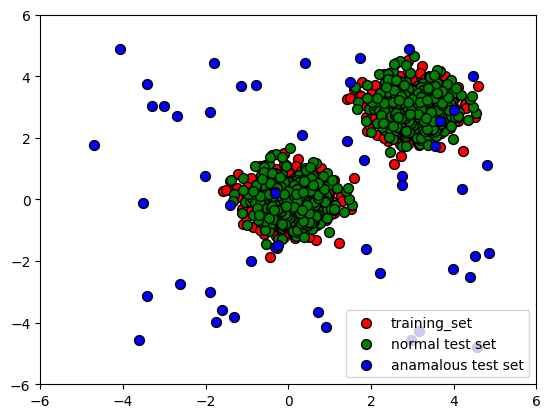

In [30]:
p1 = plt.scatter(X_train.x, X_train.y, c="red", s=50, edgecolor="black")
p2 = plt.scatter(X_test.x, X_test.y, c="green", s=50, edgecolor="black")
p3 = plt.scatter(X_outliers.x, X_outliers.y, c="blue", s=50, edgecolor="black")

plt.xlim((-6, 6))
plt.ylim((-6, 6))
plt.legend([p1, p2, p3], ["training_set", "normal test set", "anamalous test set"], loc="lower right")

plt.show()

In [34]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest()

clf.fit(X_train)

y_prediction_train = clf.predict(X_train)
y_prediction_test = clf.predict(X_test)
y_prediction_outliers = clf.predict(X_outliers)

In [35]:
X_outliers = X_outliers.assign(pred=y_prediction_outliers)
X_outliers

,x,y,pred
0,4.013452,2.914005,-1
1,4.478416,4.003258,-1
2,-1.804028,4.445616,-1
3,-3.421826,3.736280,-1
4,3.545132,1.726056,-1
5,-3.513644,-0.123972,-1
6,4.574106,-4.788376,-1
7,-2.022833,0.750192,-1
8,1.488389,3.798435,-1
9,-1.886735,-2.991099,-1


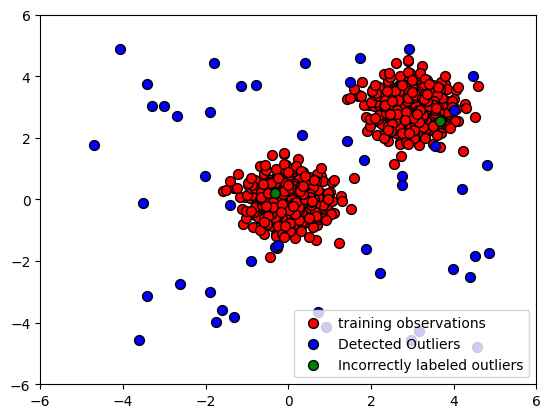

In [38]:
p1 = plt.scatter(X_train.x, X_train.y, c="red", s=50, edgecolor="black")
p2 = plt.scatter(X_outliers.loc[X_outliers.pred == -1, ["x"]], X_outliers.loc[X_outliers.pred == -1, ["y"]], c="blue", s=50, edgecolor="black")
p3 = plt.scatter(X_outliers.loc[X_outliers.pred == 1, ["x"]], X_outliers.loc[X_outliers.pred == 1, ["y"]], c="green", s=50, edgecolor="black")

plt.xlim((-6, 6))
plt.ylim((-6, 6))
plt.legend([p1, p2, p3], ["training observations", "Detected Outliers", "Incorrectly labeled outliers"], loc="lower right")

plt.show()

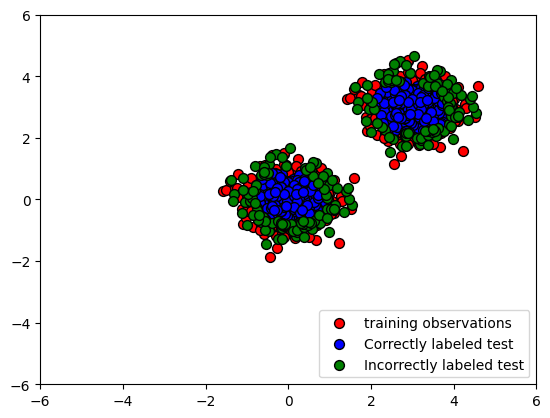

In [41]:
X_test = X_test.assign(pred=y_prediction_test)
X_test

p1 = plt.scatter(X_train.x, X_train.y, c="red", s=50, edgecolor="black")
p2 = plt.scatter(X_test.loc[X_test.pred == 1, ["x"]], X_test.loc[X_test.pred == 1, ["y"]], c="blue", s=50, edgecolor="black")
p3 = plt.scatter(X_test.loc[X_test.pred == -1, ["x"]], X_test.loc[X_test.pred == -1, ["y"]], c="green", s=50, edgecolor="black")

plt.xlim((-6, 6))
plt.ylim((-6, 6))
plt.legend([p1, p2, p3], ["training observations", "Correctly labeled test", "Incorrectly labeled test"], loc="lower right")

plt.show()